# <center>Datos geográficos con GeoPandas y Jupyter.</center>

## <center>¿A que nos referimos con datos geográficos?</center>

> La información que describe la ubicación y los atributos de las cosas, incluidas su forma y representación. Los datos geográficos son un compuesto de datos espaciales y de atributos. __[ESRI Diccionario SIG](https://support.esri.com/es-es/gis-dictionary/geographic-data)__

## <center>¿Dónde podemos encontrar información geográfica?</center>

__[Instituto Geográfico Nacional](https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG)__  
__[Datos Abiertos de Argentina](https://datos.gob.ar/dataset/jgm-servicio-normalizacion-datos-geograficos)__  
__[GeoARBA](http://www.arba.gov.ar/geoarba/inicio.asp)__  


## <center>¿Y en que formato se encuentra la información geográfica?</center>

### Se puede encontrar información geográfica en formato de archivos de intercambio.  

El formato más utilizado (y antiguo) es el formato [ESRI Shapefile](https://www.esri.com/content/dam/esrisites/sitecore-archive/Files/Pdfs/library/whitepapers/pdfs/shapefile.pdf), el cual es propietario. Es un formato vectorial, en el se guarda la información como vectores junto a sus atributos asociados.  
El [GML(Geography Markup Language)](https://www.ogc.org/standard/gml/) Creado por el grupo OpenGIS que devino en la [OGC(Open Geospatial Consortium)](https://www.ogc.org/).  
Otro formato utilizado es el [KML(Keyhole Markup Language)](https://www.ogc.org/standard/kml/), esta basado en XML y con muchas similitudes al GML. Fue desarrollado para Keyhole LT (ahora Google Earth). La versión 2.2 del formato es el estándar de la industria.  
Tambíen existe el formato sencillo GeoJSON, siendo este un formato stándar abierto y es mantenido por una comunidad de desarrolladores en internet.  
### Tambien se desarrollan servicios de información geográfica  
Son llamados Geoservices y hay varias plataformas que los brindan. La mayoría utiliza los stándares [WMS](https://www.ogc.org/standard/wms/) y [WFS](https://www.ogc.org/standard/wfs/)


### Las librerías de python que utilizaremos son las siguientes:
   * pandas: __[pandas.org](https://pandas.pydata.org/)__
> Pandas es una herramienta de análisis y manipulación de datos de código abierto rápida, potente, flexible y fácil de usar, construido sobre el lenguaje de programación Python.

   * geopandas: __[geopandas.org](https://geopandas.org/en/stable/)__
> GeoPandas es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas amplía los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas son realizadas por shapely. Geopandas depende además de fiona para el acceso a los archivos y de matplotlib para el trazado.

   * matplotlib: __[matplotlib.org](https://matplotlib.org/)__
> Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python. Matplotlib hace que las cosas fáciles sean fáciles y las difíciles sean posibles.

# <center>Veamos un ejemplo</center>

### Los datasets a utilizar son los siguientes:
   * Archivo shape con la informacion geográfica de las comunas de CABA __[descarga shapefile](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas-zip.zip)__
   * Rampas de accesibilidad - Relevamiento 2016 (CABA)  __[descarga csv](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-espacio-publico-e-higiene-urbana/rampas-de-accesibilidad/rampas-de-accesibilidad-relevamiento-2016.csv)__

### Preparando la informacion

En el siguiente bloque importamos las librerías necesarias.

Primero importamos **pandas**, esto nos permitirá usar las funciones que provee y el módulo **geopandas**, que nos permitirá mostrar la información geográfica.

In [1]:
import pandas as pd
import geopandas as gpd

También el módulo **pyplot** de **matplotlib** y **os.path** para acceder  a los distintos archivos. 

In [2]:
import matplotlib.pyplot as plt
import os.path

Definimos el path a utilizar y los datasets.

In [3]:
dir_datasets = "datasets"
comunas_caba_shp = "comunas.shp"
rampas_relevamiento_2016 = "rampas-de-accesibilidad-relevamiento-2016.csv"

path_datasets = os.path.join(os.getcwd(), dir_datasets)

### ¿Qué contiene el archivo de información geográfica (comunas.shp)?<a name="info1"></a>

<a id="gdf"></a>
Leemos la información del archivo que contiene la información de las comunas de CABA (shape) utilizando el metodo __[read_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas-read-file)__ de geopandas asignándolo a la variable comunas.

In [4]:
comunas = gpd.read_file(os.path.join(path_datasets, comunas_caba_shp))

¿Qué contiene esta variable?¿De qué tipo es?

In [5]:
type(comunas)

geopandas.geodataframe.GeoDataFrame

<a id="gdf"></a>
La variable **comunas** es lo que se conoce como un __[GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas-geodataframe)__.
<div class="alert alert-block alert-success">
    <i><b>GeoDataFrame:</b> Es un pandas.DataFrame que tiene una columna con geometría.</i>
</div>

Vemos parte del contenido del [GeoDataFrame](#gdf) mediante el metodo __[head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head)__.

In [6]:
comunas.head()

,ID,OBJETO,COMUNAS,BARRIOS,PERIMETRO,AREA,geometry
0,1,LIMITE COMUNAL,2.0,RECOLETA,21452.838648,6.317265e+06,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,3,LIMITE COMUNAL,6.0,CABALLITO,10990.964471,6.851029e+06,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,6,LIMITE COMUNAL,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,18332.037457,1.265656e+07,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."
3,7,LIMITE COMUNAL,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,19987.696155,1.412004e+07,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."
4,8,LIMITE COMUNAL,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,17232.189372,1.557093e+07,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."


La columna **geometry** contiene la información geográfica de cada una de las comunas como tipo de geometría [polígono](https://shapely.readthedocs.io/en/stable/manual.html?highlight=polygon#polygons).

## Graficamos <a name="graficamos"></a>

Para poder graficar el mapa, utilizamos el metodo __[plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)__ que recibe como parámetro las dimensiones finales de la imagen el color de los polígonos a utilizar y el color de los bordes de cada polígono.

<Axes: >

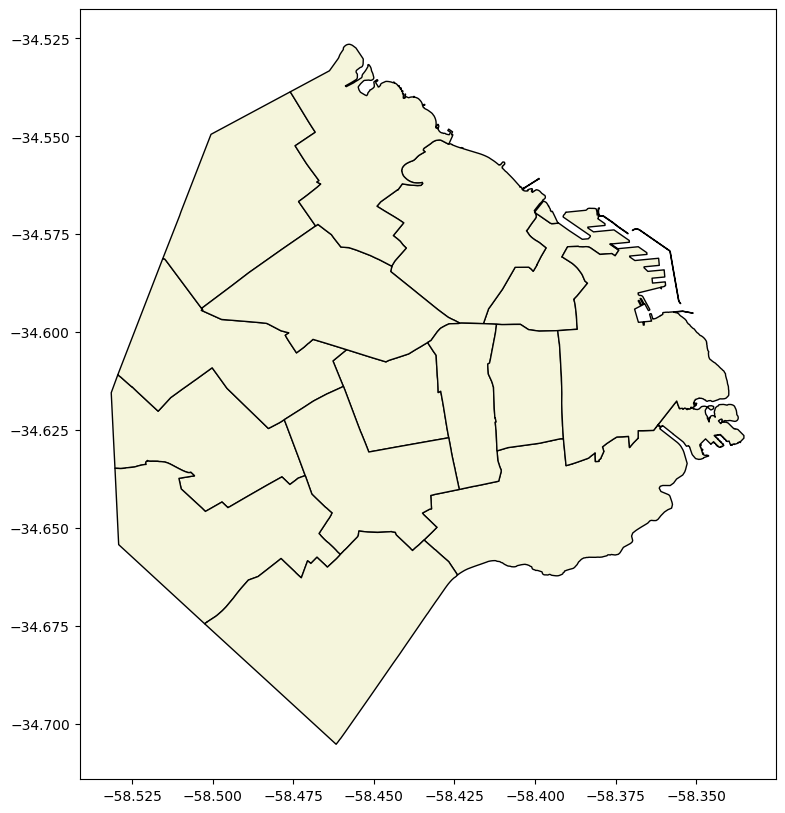

In [7]:
comunas.plot(figsize=(10,10), color='beige',edgecolor='black')

Como podemos observar, el mapa anterior no nos brinda el nombre de cada una de las comunas. 

## Agregamos algunos datos al gráfico <a name="agregamos"></a>

Para poder subsanar el problema debemos trabajar un poco el GeoDataFrame realizando los siguientes pasos:
   * **Vamos a incluir el nombree de la comuna**: para esto creamos una nueva columna de tipo __[POINT](https://shapely.readthedocs.io/en/stable/manual.html?highlight=polygon#points)__. Este dato es importante ya que es en este punto, calculado con el método __[representative_point()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.representative_point.html#geopandas-geoseries-representative-point)__, donde se va a escribir el nombre de la comuna sobre el mapa.


In [16]:
comunas['coords'] = comunas['geometry'].apply(lambda x: x.representative_point().coords[:])

/opt/conda/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [ ]:
comunas.head()

   * Dado que el paso anterior nos devuelve una __[GeoSerie](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas-geoseries)__ debemos quedarnos con el punto generado para cada registro del [GeoDataFrame](#gdf).

In [17]:
comunas['coords'] = [coords[0] for coords in comunas['coords']]

In [ ]:
comunas.head()

   * Por último, creamos un campo llamado **nombre_comuna** el cual completamos, para cada registro del [GeoDataFrame](#gdf), con la concatenación del string 'Comuna ' mas el dato contenido en la columna COMUNAS (es en esta columna donde se encuentra el número de comuna).

In [18]:
comunas['nombre_comuna'] = comunas.apply(lambda x: 'Comuna ' + str(int(x['COMUNAS'])), axis=1)

In [ ]:
comunas.head()

Ahora podemos volver a dibujar el mapa esta vez trabajando un poco con la libreria matplotlib para poder informar los nombres de las comunas sobre el mismo.

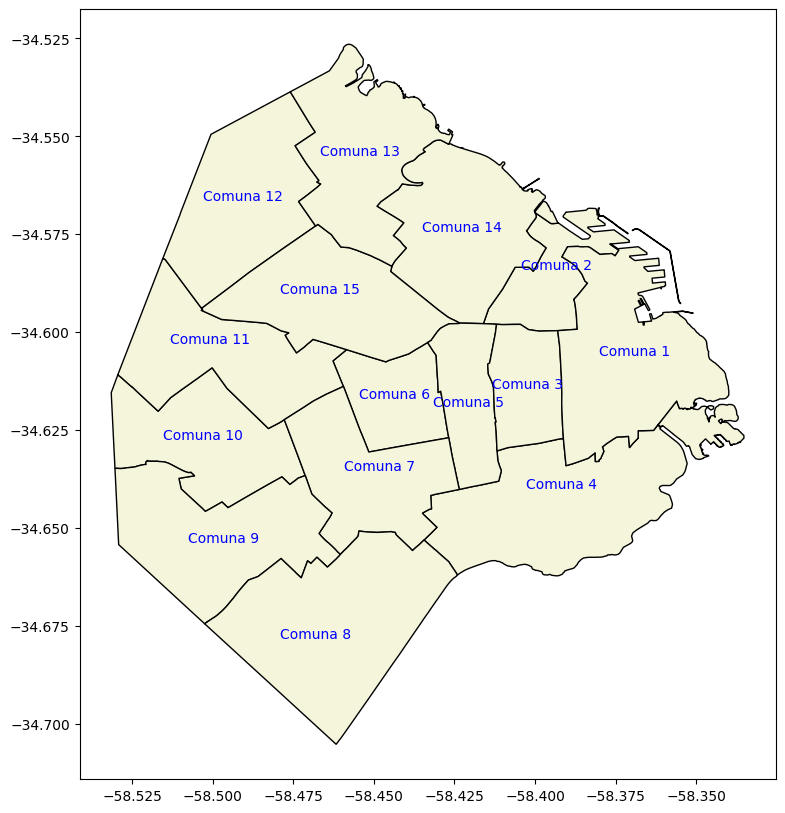

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
comunas.plot(ax=ax, color='beige', edgecolor='black')
for idx, row in comunas.iterrows():   
    plt.annotate(text=row['nombre_comuna'], xy=row['coords'], horizontalalignment='center', color='blue')

# Agregamos las rampas<a name="rampas"></a>


## Exploremos el dataset de las rampas  

Leemos el dataset de las rampas de CABA, este archivo contiene la latitud y la longitud de la ubicación en el mapa para cada una de las rampas. Su __[sistemas de refrencia de coordenadas](https://en.wikipedia.org/wiki/Spatial_reference_system)__ es el __[EPSG: 4326](https://epsg.org/crs_4326/WGS-84.html)__.
Para leer el dataset utilizamos el metodo __[read_csv()](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.read_csv.html)__ de Pandas

In [20]:
rampas_2016 = pd.read_csv(os.path.join(path_datasets, rampas_relevamiento_2016), delimiter=';')

In [21]:
rampas_2016.head()

,X,Y,ID,MES,SEMANA,ZONA,CALLE,ALTURA,ESTADO,DOM_NORMA,DOM_GEO
0,-58.401517,-34.613463,1,AGOSTO,1 AL 6,2 Y 3,ALBERTI,315.0,FINALIZADO,ALBERTI 315,315 ALBERTI
1,-58.403174,-34.598833,2,AGOSTO,1 AL 6,2 Y 3,CORDOBA AV,2554.0,FINALIZADO,CORDOBA AV. 2554,2554 CORDOBA AV.
2,-58.394427,-34.618371,3,AGOSTO,1 AL 6,2 Y 3,INDEPENDENCIA AV,1998.0,FINALIZADO,INDEPENDENCIA AV. 1998,1998 INDEPENDENCIA AV.
3,-58.512667,-34.609169,4,AGOSTO,1 AL 6,4,SIMBRON Y MARCOS PAZ,NaN,FINALIZADO,"SIMBRON Y PAZ, MARCOS","SIMBRON & PAZ, MARCOS"
4,-58.510953,-34.609638,5,AGOSTO,1 AL 6,4,TINOGASTA Y ZURICH,NaN,FINALIZADO,TINOGASTA Y ZURICH,TINOGASTA & ZURICH


### ¿Cómo agregamos los puntos donde se encuentran las rampas?<a name="nueva_geometria"></a>


- Debemos crear las geometrías para cada una de las rampas contenidas en el dataset de rampas_2016.
- Para eso importamos de la librería shapely.geometry las geometría POINT

In [24]:
from shapely.geometry import Point
geometry = gpd.points_from_xy(rampas_2016['X'], rampas_2016['Y'])

In [25]:
geometry[:3]

<GeometryArray>
[<POINT (-58.402 -34.613)>, <POINT (-58.403 -34.599)>,
 <POINT (-58.394 -34.618)>]
Length: 3, dtype: geometry

### Ahora creamos el GeoDataFrame ...

En las siguientes líneas creamos el dataframe geografico asignandole los datos del dataframe de rampas_2016 y las geometrias creadas anteriormente.

In [26]:
rampas_2016_gdf = gpd.GeoDataFrame(rampas_2016,
                                  crs='epsg:4326',
                                  geometry=geometry)

In [27]:
rampas_2016_gdf.head()

,X,Y,ID,MES,SEMANA,ZONA,CALLE,ALTURA,ESTADO,DOM_NORMA,DOM_GEO,geometry
0,-58.401517,-34.613463,1,AGOSTO,1 AL 6,2 Y 3,ALBERTI,315.0,FINALIZADO,ALBERTI 315,315 ALBERTI,POINT (-58.40152 -34.61346)
1,-58.403174,-34.598833,2,AGOSTO,1 AL 6,2 Y 3,CORDOBA AV,2554.0,FINALIZADO,CORDOBA AV. 2554,2554 CORDOBA AV.,POINT (-58.40317 -34.59883)
2,-58.394427,-34.618371,3,AGOSTO,1 AL 6,2 Y 3,INDEPENDENCIA AV,1998.0,FINALIZADO,INDEPENDENCIA AV. 1998,1998 INDEPENDENCIA AV.,POINT (-58.39443 -34.61837)
3,-58.512667,-34.609169,4,AGOSTO,1 AL 6,4,SIMBRON Y MARCOS PAZ,NaN,FINALIZADO,"SIMBRON Y PAZ, MARCOS","SIMBRON & PAZ, MARCOS",POINT (-58.51267 -34.60917)
4,-58.510953,-34.609638,5,AGOSTO,1 AL 6,4,TINOGASTA Y ZURICH,NaN,FINALIZADO,TINOGASTA Y ZURICH,TINOGASTA & ZURICH,POINT (-58.51095 -34.60964)


### Pregunta: ¿cuáles son los estados de las rampas?

Nos fijamos que estados tienen las rampas y vemos que son FINALIZADO o EN EJECUCIÓN, esto nos servirá para poder representar en el mapa los puntos donde existe una rampa y diferenciarlos por su estado.

In [28]:
rampas_2016_gdf['ESTADO'].unique()

array(['FINALIZADO', 'EN EJECUCIÓN'], dtype=object)

### El gráfico completo <a name="grafico_completo"></a>  
Generamos el mapa con las marcas correspondientes segun el estado.

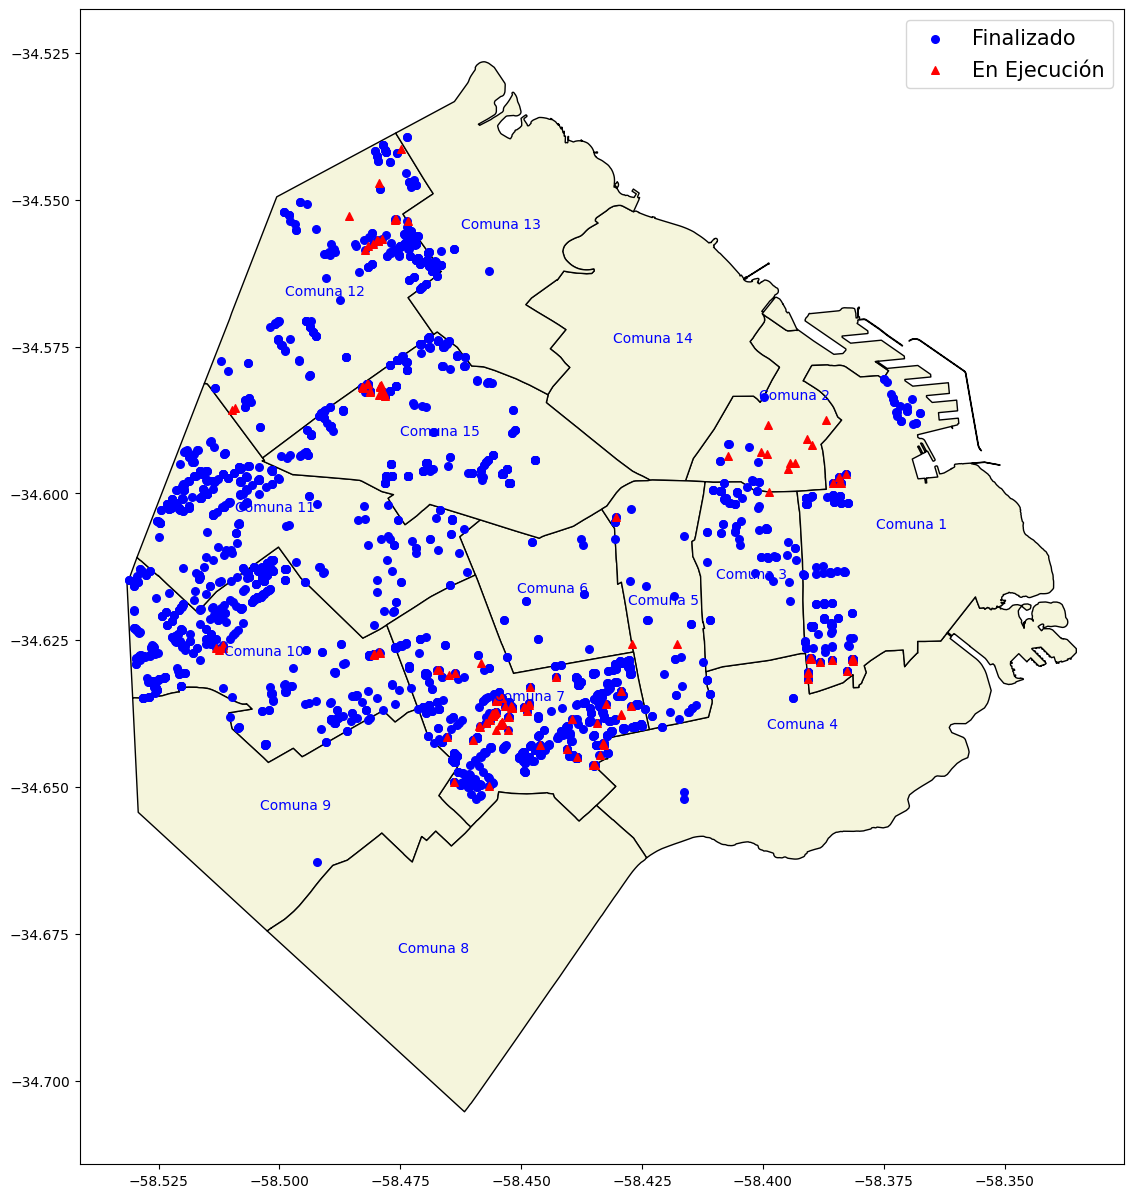

In [29]:
fig, ax = plt.subplots(figsize = (15,15))
comunas.plot(ax = ax, color='beige', edgecolor='black')
for idx, row in comunas.iterrows():   
    plt.annotate(text=row['nombre_comuna'], xy=row['coords'], horizontalalignment='center', color='blue')
rampas_2016_gdf[rampas_2016_gdf['ESTADO']=='FINALIZADO'].plot(ax=ax, markersize=30, color='blue', marker='o', label='Finalizado')
rampas_2016_gdf[rampas_2016_gdf['ESTADO']=='EN EJECUCIÓN'].plot(ax=ax, markersize=30, color='red', marker='^', label='En Ejecución')
plt.legend(prop={'size': 15})

# Las comunas en un mapa

Es posible graficar sobre un mapa interactivo.

Más info en:
- https://leafletjs.com/
- https://www.openstreetmap.org/

In [30]:
comunas.explore(style_kwds=dict(color="blue"), tooltip="BARRIOS")